In [64]:
import geopandas as gpd
import rasterio
from rasterio import features
import matplotlib.pyplot as plt

In [43]:
# MTK-virtavesi
#*************
#1: virtavesialue (3D Polygon), kohdeluokat: 36313
#2: virtavesikapea (3D Line String), kohdeluokat: 36311, 36312
#MTK-vakavesi
#************
#1: jarvi (3D Polygon), kohdeluokat: 36200
#2: meri (3D Polygon), kohdeluokat: 36211
#MTK-tie
#*******
#1: tienroteksti (3D Point), kohdeluokat: 12106, 12181, 12182, 12183
#2: tiesymboli (3D Point), kohdeluokat: 12192, 12193, 12200
#3: tieviiva (3D Line String), kohdeluokat: 12111, 12112, 12121, 12122, 12131, 12132, 12141, 12151, 12152, 12311, 12312, 12313, 12314, 12316

In [24]:
file = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-virtavesi_23-03-02.gpkg'
file2 = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-tie_23-03-02.gpkg'
file3 = r'/appl/data/geo/mml/maastotietokanta/2023/gpkg/MTK-vakavesi_23-03-02.gpkg'

new_subset = [350016.0, 6858072.0, 357856.0, 6864536.0]

In [52]:
vive = gpd.read_file(file, layer='virtavesikapea', include_fields=["kohdeluokka", "geometry"], bbox=new_subset)
vave = gpd.read_file(file3, layer='jarvi', include_fields=["kohdeluokka", "geometry"], bbox=new_subset)
tiet = gpd.read_file(file2, layer='tieviiva', include_fields=["kohdeluokka", "geometry"], bbox=new_subset)

In [41]:
vave.head()

,kohdeluokka,geometry
0,36200,"POLYGON Z ((356456.557 6864458.512 147.900, 35..."
1,36200,"POLYGON Z ((356634.860 6864242.762 147.900, 35..."
2,36200,"POLYGON Z ((354982.572 6862441.279 141.900, 35..."
3,36200,"POLYGON Z ((354698.378 6863743.893 157.900, 35..."
4,36200,"POLYGON Z ((350010.810 6863502.742 141.400, 35..."


In [50]:
vive.head()

,kohdeluokka,geometry
0,36313,"POLYGON Z ((357115.906 6858975.945 141.034, 35..."
1,36313,"POLYGON Z ((358230.478 6856254.852 136.632, 35..."


In [47]:
tiet.head()

,kohdeluokka,geometry
0,12313,"LINESTRING Z (349983.906 6857955.429 171.657, ..."
1,12313,"LINESTRING Z (350958.786 6858170.678 171.866, ..."
2,12141,"LINESTRING Z (353754.825 6858108.978 162.398, ..."
3,12316,"LINESTRING Z (352394.232 6858111.081 169.840, ..."
4,12316,"LINESTRING Z (352504.814 6857620.054 172.745, ..."


<Axes: >

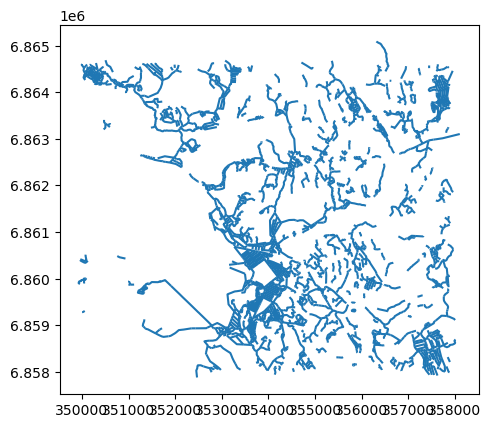

In [53]:
vive.plot()

<Axes: >

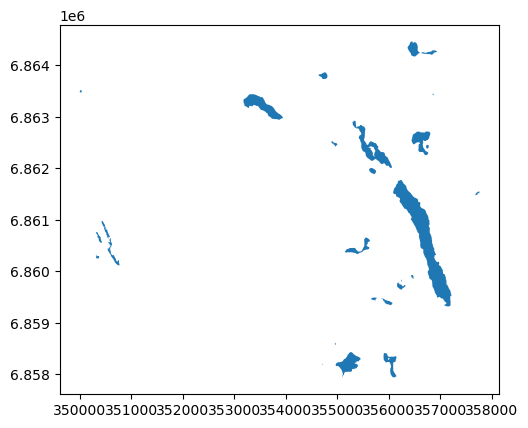

In [45]:
vave.plot()

<Axes: >

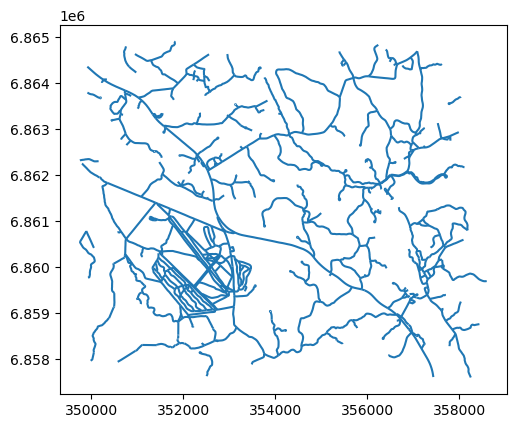

In [48]:
tiet.plot()

In [55]:
rst_fn = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/cmask_d8_kuivajarvi_fill.asc'
out_fn = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/streams.asc'

In [56]:
rst = rasterio.open(rst_fn)
meta = rst.meta.copy()
meta.update(compress='lzw')

In [58]:
rst.meta

{'driver': 'AAIGrid',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 490,
 'height': 404,
 'count': 1,
 'crs': None,
 'transform': Affine(16.0, 0.0, 350016.0,
        0.0, -16.0, 6864536.0)}

In [1]:
with rasterio.open(out_fn, 'w+', **meta) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(vive.geometry, vive.kohdeluokka))

    burned = features.rasterize(shapes=shapes, fill=-9999, out=out_arr, transform=out.transform)
    #burned[burned == 0] = -9999
    out.write_band(1, burned)

NameError: name 'rasterio' is not defined

In [78]:
burned

array([[-9999., 36311., -9999., ..., 36311., -9999., 36311.],
       [-9999., 36311., -9999., ..., -9999., -9999., -9999.],
       [-9999., 36311., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., 36311., -9999., -9999.],
       [-9999., -9999., -9999., ..., 36311., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., 36311., -9999.]],
      dtype=float32)

In [80]:
from tools import read_AsciiGrid

file = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/streams.asc'
test = read_AsciiGrid(file)
#plt.imshow(test[0])

In [81]:
test

(array([[   nan, 36311.,    nan, ..., 36311.,    nan, 36311.],
        [   nan, 36311.,    nan, ...,    nan,    nan,    nan],
        [   nan, 36311.,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ..., 36311.,    nan,    nan],
        [   nan,    nan,    nan, ..., 36311.,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan, 36311.,    nan]]),
 ['ncols        490\n',
  'nrows        404\n',
  'xllcorner    350016.000000000000\n',
  'yllcorner    6858072.000000000000\n',
  'cellsize     16.000000000000\n',
  'NODATA_value  -9999\n'],
 (350016.0, 6858072.0),
 16.0,
 nan)